In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load and prepare data
store_data = pd.read_csv(r'D:\DepiTasks\Retail-Sales-Project\store-sales-time-series-forecasting/transactions.csv')
train = pd.read_csv(r'D:\DepiTasks\Retail-Sales-Project\store-sales-time-series-forecasting/train.csv')

In [3]:
# Group by store and aggregate sales and promotions
store_agg = train.groupby('store_nbr').agg({
    'sales': 'sum',
    'onpromotion': 'sum'
}).reset_index()

In [4]:
# Normalize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(store_agg[['sales', 'onpromotion']])

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'Inertia')

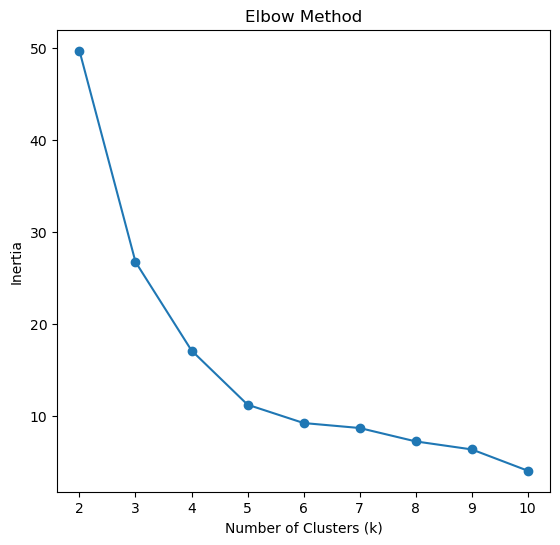

In [5]:
# Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Testing for k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting Elbow Method
plt.figure(figsize=(14, 6))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

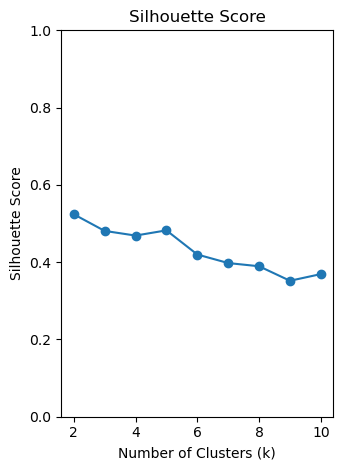

In [6]:
# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Set limit for better visualization

plt.tight_layout()
plt.show()

In [7]:
# Choose optimal number of clusters based on elbow method and silhouette score
optimal_k = 5  # Change this based on the plots

# Apply K-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
store_agg['cluster'] = kmeans.fit_predict(X_scaled)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


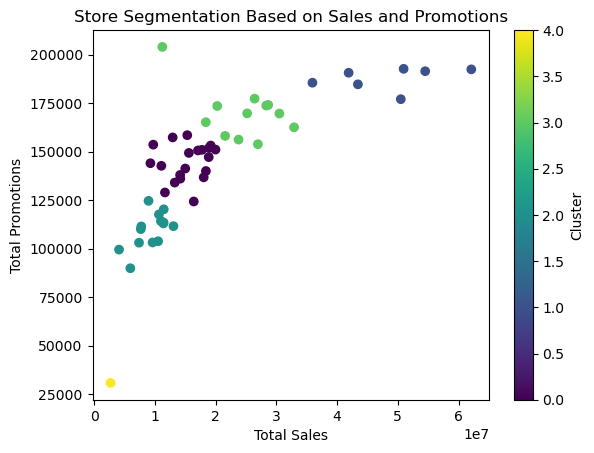

In [8]:
# Visualize clusters
plt.scatter(store_agg['sales'], store_agg['onpromotion'], c=store_agg['cluster'], cmap='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Total Promotions')
plt.title('Store Segmentation Based on Sales and Promotions')
plt.colorbar(label='Cluster')
plt.show()